In [1]:
# import necessary packages
%matplotlib inline
import geopandas as gpd
import seaborn as sns
import pandas as pd
import pysal
import numpy as np
import mapclassify
import matplotlib.pyplot as plt

nz_SA2 = gpd.read_file('statsnzstatistical-area-2-2018-generalised-SHP/statistical-area-2-2018-generalised.shp')
# nz_SA2 =nz_SA2.drop(['LAND_AREA_','AREA_SQ_KM','Shape_Leng'], axis=1) #did nothing useful
nz_SA2.head()

/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


,SA22018_V1,SA22018__1,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry
0,190000,Te More,47.922581,47.922581,33420.011116,"POLYGON ((1862216.162 5670176.110, 1862228.190..."
1,100400,Karikari Peninsula,174.180816,174.180816,140012.346179,"MULTIPOLYGON (((1636338.253 6150839.030, 16363..."
2,100500,Tangonge,177.204343,177.204343,101241.085328,"POLYGON ((1622137.152 6120265.782, 1623239.835..."
3,100900,Rangitihi,84.660427,84.660427,60678.427036,"POLYGON ((1626461.006 6119158.300, 1626465.326..."
4,101000,Oruru-Parapara,103.280728,103.280728,67331.035524,"MULTIPOLYGON (((1638658.179 6128997.442, 16386..."


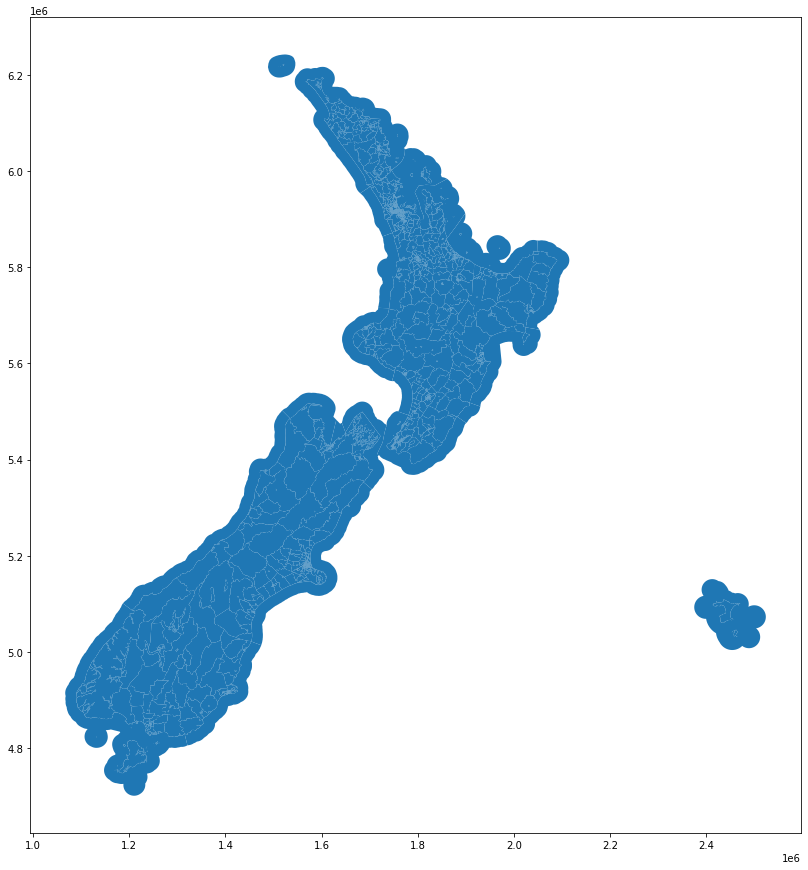

In [2]:
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (15,15))
nz_SA2.plot(ax=ax)
plt.show()

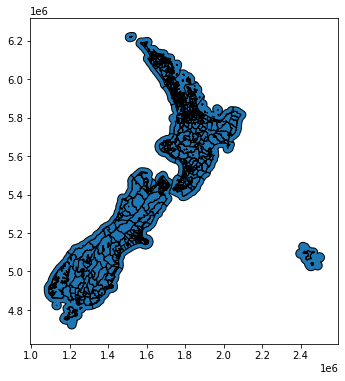

In [7]:
nz_SA2.plot(figsize=(6, 6),edgecolor='black')
plt.show()

In [8]:
nz_SA2.head()

,SA22018_V1,SA22018__1,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry
0,190000,Te More,47.922581,47.922581,33420.011116,"POLYGON ((1862216.162 5670176.110, 1862228.190..."
1,100400,Karikari Peninsula,174.180816,174.180816,140012.346179,"MULTIPOLYGON (((1636338.253 6150839.030, 16363..."
2,100500,Tangonge,177.204343,177.204343,101241.085328,"POLYGON ((1622137.152 6120265.782, 1623239.835..."
3,100900,Rangitihi,84.660427,84.660427,60678.427036,"POLYGON ((1626461.006 6119158.300, 1626465.326..."
4,101000,Oruru-Parapara,103.280728,103.280728,67331.035524,"MULTIPOLYGON (((1638658.179 6128997.442, 16386..."


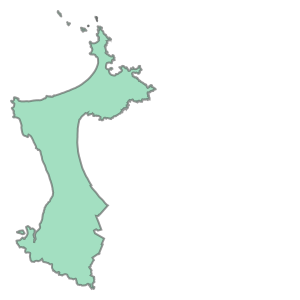

In [22]:
nz_SA2.iloc[1,5]

# A plot of the Waikato region, shaded by number of Geographic units

In [3]:
# First read file A
from pandas import DataFrame, read_csv
import numpy as np

#Read in the complete set
groupA=pd.read_csv("../CompleteSet_GroupA.csv")
groupA=groupA.drop("Unnamed: 0",axis=1)

#Strip all leading whitespace in Area column
groupA['Area'] = groupA['Area'].apply(lambda x: x.strip())
groupA.head()

,Area,TotInd_GeogUnits,TotInd_EmpCo,F_GeogUnits,F_EmpCo,G_GeogUnits,G_EmpCo,I461_GeogUnits,I461_EmpCo,I471_GeogUnits,I471_EmpCo,I481_GeogUnits,I481_EmpCo,I51_GeogUnits,I51_EmpCo,I53_GeogUnits,I53_EmpCo,ParentArea,Year
0,Total NZ by Regional Council/Statistical Area,406149.0,1599500.0,20253.0,90600.0,30204.0,167100.0,5337.0,21100.0,159.0,1450.0,63.0,800.0,3663.0,24500.0,573.0,5200.0,TOTAL,2000
1,Area Outside Region,201.0,320.0,0.0,3.0,6.0,9.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NewZealand,2000
2,Oceanic Chatham Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AreaOutsideRegion,2000
3,Chatham Islands,201.0,310.0,0.0,3.0,6.0,9.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AreaOutsideRegion,2000
4,Ross Dependency,3.0,12.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AreaOutsideRegion,2000


In [4]:
#Add column to GIS data for the geog values in 2020
waikato=subsetData=groupA[(groupA.Year==2020)&(groupA.ParentArea == 'WaikatoRegion')]
nz_SA2["TotInd_GeogUnits"] = np.nan
nz_SA2["ParentArea"] = " "
for i in range(len(waikato)):
    nz_SA2.loc[nz_SA2['SA22018__1']==waikato.iloc[i,0],'TotInd_GeogUnits']=waikato.iloc[i,1]
    nz_SA2.loc[nz_SA2['SA22018__1']==waikato.iloc[i,0],'ParentArea']="WaikatoRegion"
nz_SA2.head()

,SA22018_V1,SA22018__1,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry,TotInd_GeogUnits,ParentArea
0,190000,Te More,47.922581,47.922581,33420.011116,"POLYGON ((1862216.162 5670176.110, 1862228.190...",NaN,
1,100400,Karikari Peninsula,174.180816,174.180816,140012.346179,"MULTIPOLYGON (((1636338.253 6150839.030, 16363...",NaN,
2,100500,Tangonge,177.204343,177.204343,101241.085328,"POLYGON ((1622137.152 6120265.782, 1623239.835...",NaN,
3,100900,Rangitihi,84.660427,84.660427,60678.427036,"POLYGON ((1626461.006 6119158.300, 1626465.326...",NaN,
4,101000,Oruru-Parapara,103.280728,103.280728,67331.035524,"MULTIPOLYGON (((1638658.179 6128997.442, 16386...",NaN,


In [5]:
waikatoMap=nz_SA2[nz_SA2.ParentArea=="WaikatoRegion"]
#Remove Oceanic regions
waikatoMap=waikatoMap.drop(waikatoMap[waikatoMap.SA22018__1=="Oceanic Waikato Region West"].index)
waikatoMap=waikatoMap.drop(waikatoMap[waikatoMap.SA22018__1=="Oceanic Waikato Region East"].index)

Quantiles               

    Interval       Count
------------------------
[   nan, 129.75] |   118
(129.75, 231.00] |    60
(231.00, 328.50] |    56
(328.50,    nan] |     0


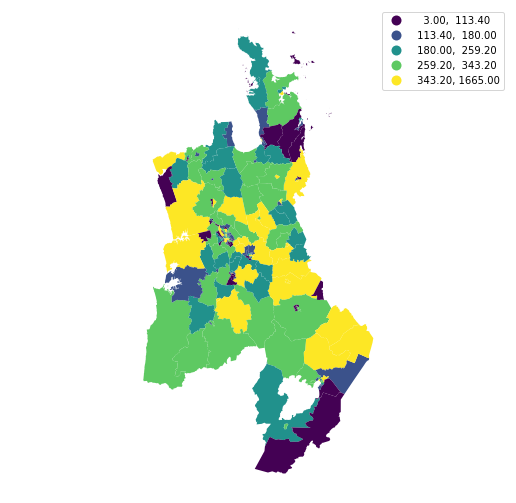

In [6]:
q5 = mapclassify.Quantiles(waikatoMap.TotInd_GeogUnits, k=4)
waikatoMap['q5'] = q5.yb
print(q5)

#waikatoMap.plot(figsize=(20, 20),edgecolor='black',column = 'TotInd_GeogUnits',cmap='viridis')
#plt.show()

f, ax = plt.subplots(1, figsize=(9, 9))
waikatoMap.plot(ax=ax, column='TotInd_GeogUnits', legend=True, scheme='Quantiles')
ax.set_axis_off()
#ax.set_title('PCGDP1940')
plt.axis('equal')
plt.show()

# Customize colors add legend
# overlay centroid

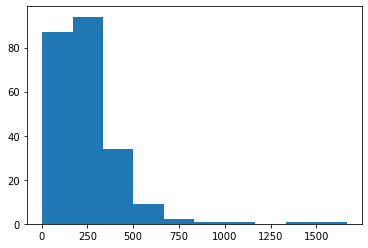

In [7]:
plt.hist(waikatoMap.TotInd_GeogUnits)
plt.show()

In [98]:
waikatoMap.TotInd_GeogUnits.median()


228.0